# Moment Anomaly Detection Example

## Loading Moment Model

In [1]:
import os 
import sys
import torch
import numpy as np

src_path = os.path.abspath(os.path.join("..", "src"))
if src_path not in sys.path:
    sys.path.insert(0, src_path)

from tsfmproject.model import MomentModel
from tsfmproject.dataset import MomentDataset
from tsfmproject.utils import load_args

arg_path = "../config/moment_detection.json"
args = load_args(arg_path)
mmt = MomentModel(**args)

## Zero-Shot Anomaly Detection Using Moment Model

In [2]:
train_dataset = MomentDataset(name="ett", path='../src/tsfmproject/models/moment/data/198_UCR_Anomaly_tiltAPB2_50000_124159_124985.out',
                              mode="train", boundaries=[50000, 50000, 0], task_name='detection', stride=512)
test_dataset = MomentDataset(name="ett", path='../src/tsfmproject/models/moment/data/198_UCR_Anomaly_tiltAPB2_50000_124159_124985.out',
                                mode="test", boundaries=[50000, 50000, 0], task_name='detection', stride=512)
print(len(train_dataset))
print(len(test_dataset))
trues, preds, labels = mmt.evaluate(test_dataset, task_name='detection')

97
153


## Visualization of Zero-Shot Anomaly Detection

Zero-shot Adjusted Best F1 Score: 0.9689099495033109


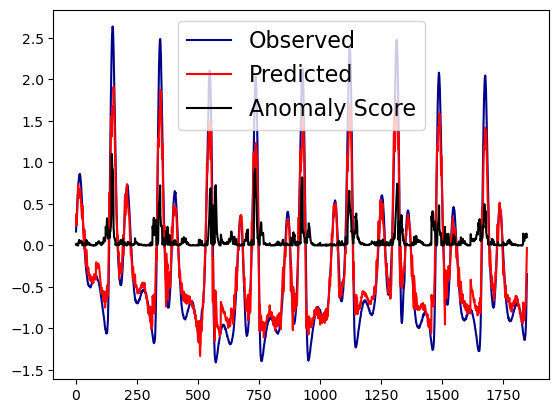

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from tsfmproject.models.moment.momentfm.utils.anomaly_detection_metrics import adjbestf1

# We will use the Mean Squared Error (MSE) between the observed values and MOMENT's predictions as the anomaly score
anomaly_scores = (trues - preds)**2

print(f"Zero-shot Adjusted Best F1 Score: {adjbestf1(y_true=labels, y_scores=anomaly_scores)}") 

anomaly_start = 74158
anomaly_end = 74984
start = anomaly_start-512
end = anomaly_end+512

plt.plot(trues[start:end], label="Observed", c='darkblue')
plt.plot(preds[start:end], label="Predicted", c='red')
plt.plot(anomaly_scores[start:end], label="Anomaly Score", c='black')
plt.legend(fontsize=16)
plt.show()

## FInetune the Moment model for anomaly detection

In [4]:
finetuned_model = mmt.finetune(train_dataset, task_name='detection', mask_ratio=0.1, epoch=5)


/nethome/sli999/anaconda3/envs/torch/lib/python3.11/site-packages/torch/utils/checkpoint.py:87: UserWarning: None of the inputs have requires_grad=True. Gradients will be None
  warnings.warn(


Epoch 0: Train loss: 0.098
Epoch 1: Train loss: 0.099
Epoch 2: Train loss: 0.104
Epoch 3: Train loss: 0.092
Epoch 4: Train loss: 0.089


## Evaluate the finetuned model and Visualization

Zero-shot Adjusted Best F1 Score: 0.9780885373202796


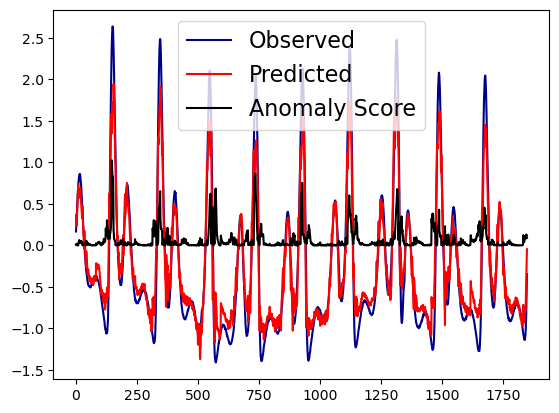

In [5]:
trues, preds, labels = mmt.evaluate(test_dataset, task_name='detection')

anomaly_scores = (trues - preds)**2

print(f"Zero-shot Adjusted Best F1 Score: {adjbestf1(y_true=labels, y_scores=anomaly_scores)}") 

anomaly_start = 74158
anomaly_end = 74984
start = anomaly_start-512
end = anomaly_end+512

plt.plot(trues[start:end], label="Observed", c='darkblue')
plt.plot(preds[start:end], label="Predicted", c='red')
plt.plot(anomaly_scores[start:end], label="Anomaly Score", c='black')
plt.legend(fontsize=16)
plt.show()